# The AlexNet (2012)

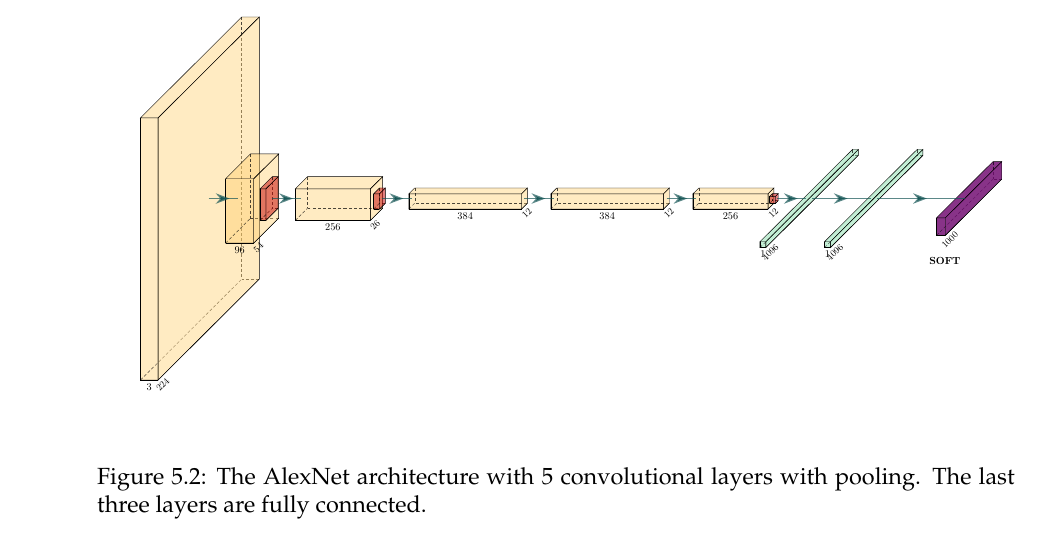

## Un poco de historia
Bibliografica:
* [33] A. Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. Imagenet classification with
deep convolutional neural networks. Communications of the ACM, 60:84 – 90, 2012.


* Ellos ganaron el
[ImageNet](https://www.image-net.org/challenges/LSVRC/) concurso.

* Fue la primera red que uso GPUs. Usaron una arquitectura dual con
dos redes corriendo side-by-side.

* 1.2 millones de imagenes (entrenamiento)
    * 50 mil de validacion
    * 150 mil de prueba


La arquitectura esta en la grafica de arriba.

Comparando con la LetNet-5

* **Redes convolucionales**: LetNet tiene 3 y esta 5
* **Funciones de Activacion**: LetNet usa tanh (pero nosotros usamos en la clase ReLU)
* **Pooling**: LeNet uso AveragePooling y aca MaxPooling

Ademas la AlexNet usa Dropout como regularizacion. Recuerde que Alex y demas (Hinton etc.) Inventaron el Dropout.

Vamos a la descripcion de la red.

* Entrada y convolucion 1.
La entrada tiene imagenes $224 \times 224 \times 3$ pixeles.
La convolucion tiene 96 filtros, striding $s=4$, kernel $11 \times 11$
La salida es

$$(224- 11)/4 + 1= 54.25 \approx 54$$
La salida es de $54 \times 54 \times 96$.
Los parametros de aprendizaje son

$$\# \text{parametros de aprendizaje} = (11 \times 11 \times 3)\times 96 = 34944 $$

Luego hay una capa con BatchNormalization.  Del articulo
tomo primeros 96 filtros. En todos los casos se usa el ReLU activation function.



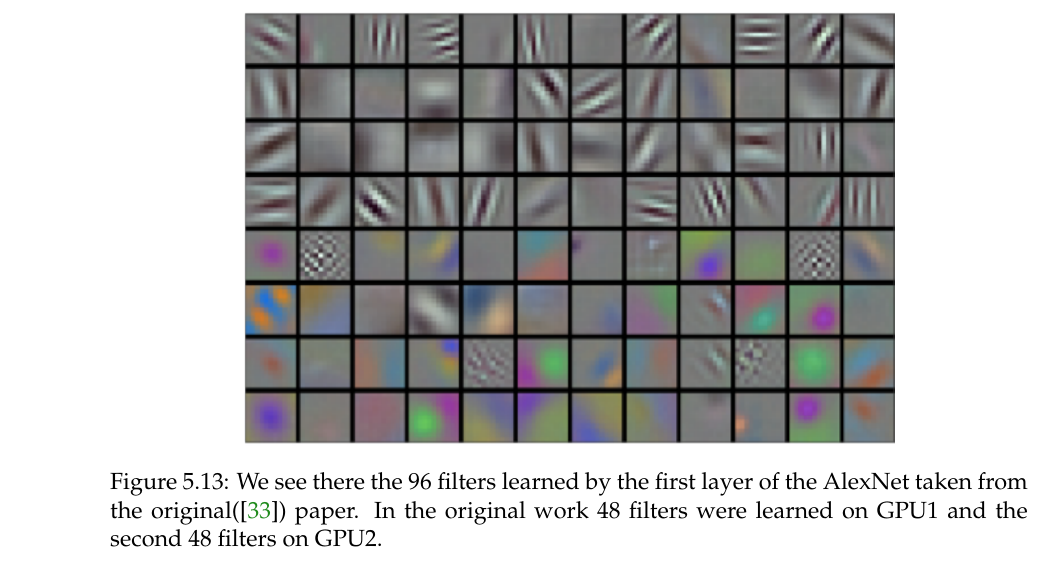

* MaxPooling: Kernel $3 \times 3$ stride $s=2$. Comm $((54-3)/2+1=26.5$.
La salida es $26 \times 26 \times 96$.

* **Convolucion 2**: El kernel es $5 \times 5$, stride $s=1$, padding $p=2$, filtros 256. Como $(26 - 5 + 2(2))/1+1=26$. La salida es $26 \times 26 \times 256$. El numero de parametros de aprendizaje

$$\# \text{parametros de aprendizaje} = (5 \times 5 \times 96 +1)\times 256 =  614656 $$

* **MaxPooling**: Kernel $3 \times 3$, $s=1$, pad $p=1$, 384 filtros de salida
Como $(12 -3 + 2)/1 +1 = 12$. La salida tiene dimesion $12 \times 12 \times 384$.

* **Convolucion 3**: El kernel es $3 \times 3$, $s=1$, $padding=p=1$,
filtros 384, Como $(12 -3 +1)/1+1=12$. La "varilla" en el diagrama tiene
$12 \times 12 \times 384$. El numero de parametros:

$$\# \text{parametros de aprendizaje} = (3 \times 3 \times 384 +1)\times 384 = 1327488 $$

* **Convolucion 5**: Kernel es $3 \times 3$, $s=1$, $p=1$, el numero de filtros es de 256. Ahora como $(12-3+2)/1+1=12$. La "varilla" es de volumen
$$12 \times 12 \times 256$. Los parametros de aprendizaje son

$$\#\text{parametros de aprendizje} = (3 \times 3 \times 384+1) \times 256 = 884992 $$

* **MaxPooling**: De kernel $3 \times 3$, stride $s=2$ no padding. Ahora como
$(12-3)/2+1=5.5 \approx 5$. La salida es de $5 \times 5 \times 26$.

* **Dropout**: El dropbout rate es 0.5.

* **Flatten**: $5 \times 5 \times 256=6400 $$.

* **Fully Connected (dense)**: La entrada es de 6400 salida de 4096. Dropout 0.5

$$\# \text{parametros de aprendizaje} = (6400 +1) \times 4096 = 26218496 $$


* **Fully connected**:  (la del articulo original)
Entrada 4096, salida 1000.

$$\# \text{parametros de aprendizaje} = (4096 + 1) \times 1000 = 4,097.000 $$

En este momento les voy a mostrar el programa implementado en las 17 Oxford-Flowers.

Yo voy a correr esta red con los datos del MNIST
No voy a usar exactamente la misma arquitectura. Voy a cambiar el numero de filtros.




In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np


# load and process the MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# normalization
train_images = np.expand_dims(train_images, axis=-1)/255.0
test_images = np.expand_dims(test_images, axis=-1)/255.0

# convertir a one-hot-encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# AlexNet like model construction
model=models.Sequential()

# primera capa convolutiva, batch noramlization and pooling
model.add(layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# segunda capa convolutiva, batch normalization and pooling
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# tercera capa convolutiva, 128 filtros, 3x3 kernel, relu activation
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))


# cuarta capa convolutiva, 128 filtros, 3x3 kernel, relu activation
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

# quinta capa convolutiva, 128 filtros, 3x3 kernel, relu activation
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# vectorizar (chorizo) flatten
model.add(layers.Flatten())

# fully connected con 512 unidades (de 4096)
model.add(layers.Dense(units=512, activation='relu'))

# fully connected con 256 unidades
model.add(layers.Dense(units=256, activation='relu'))

# fully connected con 10 unidades
model.add(layers.Dense(units=10, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)









11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9028 - loss: 0.3050 - val_accuracy: 0.9730 - val_loss: 0.1013
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9808 - val_loss: 0.0571
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9902 - loss: 0.0290 - val_accuracy: 0.9925 - val_loss: 0.0286
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.9920 - val_loss: 0.0296
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9900 - val_loss: 0.0344
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9916 - val_loss: 0.0323
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9955 - loss: 0.0155 - val_accuracy: 0.9905 - val_loss: 0.0329
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9966 - loss: 0.0116 - val_accuracy: 

# Proxima clase VGGNet y depronto mas.